In [6]:
import torch
import torchvision
from torchvision import transforms,datasets

In [7]:
train = datasets.MNIST("",train=True,download=True,
                      transform = transforms.Compose([transforms.ToTensor()])
                      )
test = datasets.MNIST("",train=True,download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


In [8]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x,y = data[0][0],data[1][0]

In [11]:
print(y)

tensor(2)


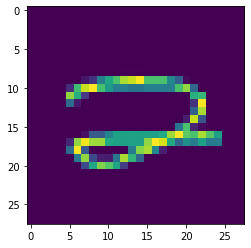

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [13]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [14]:
total = 0 
counter_dict={0:0 , 1:0 ,2:0 ,3:0 ,4:0 ,5:0 ,6:0 ,7:0 ,8:0 ,9:0 }

for data in trainset:
    Xs,ys=data
    for y in ys :
        counter_dict[int(y)]+=1
        total +=1


for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")         

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        
        return F.log_softmax(x,dim=1)
        

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
X = torch.rand((28,28))

In [18]:
X=X.view(-1,28*28)

In [19]:
output=net(X)

In [20]:
output

tensor([[-2.2945, -2.2850, -2.3677, -2.2150, -2.3112, -2.4111, -2.2077, -2.2855,
         -2.2180, -2.4628]], grad_fn=<LogSoftmaxBackward>)

In [21]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

EPOCHS =3

for epoch in range(EPOCHS):
    for data in trainset:
        X,y =data
        net.zero_grad()
        output =net(X.view(-1,28*28))
        loss =F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)
    
    
    
    
    
    

tensor(0.0454, grad_fn=<NllLossBackward>)
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor(0.0985, grad_fn=<NllLossBackward>)


In [22]:
correct =0
total=0

with torch.no_grad():
    for data in trainset:
        X,y =data
        output = net(X.view(-1,28*28))
        for idx , i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print("Accuracy : ", round(correct/total,2)*100)
            
            

Accuracy :  98.0


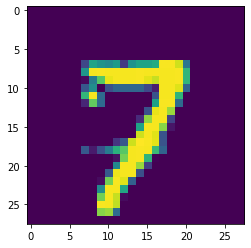

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [28]:
print(torch.argmax(net(X[1].view(-1,28*28))[0]))

tensor(7)
